In [ ]:
#importing the data

import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'combined_data.csv'

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(csv_file_path)

# Display the loaded data
print(data.head())


                  time  ghi_pyr    dni    dhi  air_temperature  \
0  2014-10-25 13:10:00    628.3  652.3  191.3             25.5   
1  2014-10-25 13:20:00    618.6  654.6  186.6             25.3   
2  2014-10-25 13:30:00    603.9  649.1  184.5             25.4   
3  2014-10-25 13:40:00    584.1  635.7  182.6             25.5   
4  2014-10-25 13:50:00    564.7  624.9  180.0             25.4   

   relative_humidity  wind_speed  wind_speed_of_gust  \
0               46.9         3.9                 6.4   
1               47.2         3.8                 5.6   
2               46.4         4.0                 5.6   
3               46.2         3.4                 5.6   
4               47.1         4.5                 6.9   

   wind_from_direction_st_dev  wind_from_direction  barometric_pressure  \
0                        12.7                266.0                948.3   
1                        13.6                257.0                948.1   
2                        12.9            

<ipython-input-1-02cad508914a>:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file_path)


In [ ]:
#data preprocessing
# Find and replace null values with a specific value, such as 0
data_filled = data.fillna(0)

# Display the updated DataFrame
print(data_filled.head())

                  time  ghi_pyr    dni    dhi  air_temperature  \
0  2014-10-25 13:10:00    628.3  652.3  191.3             25.5   
1  2014-10-25 13:20:00    618.6  654.6  186.6             25.3   
2  2014-10-25 13:30:00    603.9  649.1  184.5             25.4   
3  2014-10-25 13:40:00    584.1  635.7  182.6             25.5   
4  2014-10-25 13:50:00    564.7  624.9  180.0             25.4   

   relative_humidity  wind_speed  wind_speed_of_gust  \
0               46.9         3.9                 6.4   
1               47.2         3.8                 5.6   
2               46.4         4.0                 5.6   
3               46.2         3.4                 5.6   
4               47.1         4.5                 6.9   

   wind_from_direction_st_dev  wind_from_direction  barometric_pressure  \
0                        12.7                266.0                948.3   
1                        13.6                257.0                948.1   
2                        12.9            

In [ ]:
#data preprocessing
# Drop duplicate rows
data_deduplicated = data_filled.drop_duplicates()
import pandas as pd


# Remove white spacing from attribute names
data_deduplicated.columns = data_deduplicated.columns.str.strip()


# Write the deduplicated DataFrame back to a CSV file
data_deduplicated.to_csv('combined_data.csv', index=False)

In [ ]:
# Display the updated DataFrame shape
print("Original shape:", data.shape)
print("Modified shape:", data_deduplicated.shape)

Original shape: (383540, 16)
Modified shape: (383540, 16)


In [ ]:
#data preprocessing
import pandas as pd



# Convert columns to relevant data types

data_deduplicated['ghi_pyr'] = data_deduplicated['ghi_pyr'].astype(float)
data_deduplicated['dni'] = data_deduplicated['dni'].astype(float)
data_deduplicated['dhi'] = data_deduplicated['dhi'].astype(float)
data_deduplicated['air_temperature'] = data_deduplicated['air_temperature'].astype(float)
data_deduplicated['relative_humidity'] = data_deduplicated['relative_humidity'].astype(float)
data_deduplicated['wind_speed'] = data_deduplicated['wind_speed'].astype(float)
data_deduplicated['wind_speed_of_gust'] = data_deduplicated['wind_speed_of_gust'].astype(float)
data_deduplicated['wind_from_direction_st_dev'] = data_deduplicated['wind_from_direction_st_dev'].astype(float)
data_deduplicated['wind_from_direction'] = data_deduplicated['wind_from_direction'].astype(int)
data_deduplicated['barometric_pressure'] = data_deduplicated['barometric_pressure'].astype(float)
data_deduplicated['sensor_cleaning'] = data_deduplicated['sensor_cleaning'].astype(int)
data_deduplicated['ghi_rsi'] = data_deduplicated['ghi_rsi'].astype(int)

# Display the updated DataFrame
data_deduplicated = data_deduplicated.drop(['dni', 'dhi', 'wind_speed_of_gust', 'wind_from_direction_st_dev',
                  'sensor_cleaning', 'ghi_rsi'], axis=1)
print(data_deduplicated.head())
print("Modified shape:", data_deduplicated.shape)

   ghi_pyr  air_temperature  relative_humidity  wind_speed  \
0    628.3             25.5               46.9         3.9   
1    618.6             25.3               47.2         3.8   
2    603.9             25.4               46.4         4.0   
3    584.1             25.5               46.2         3.4   
4    564.7             25.4               47.1         4.5   

   wind_from_direction  barometric_pressure actual_date  day_lenght  
0                  266                948.3  2014-10-25       662.0  
1                  257                948.1  2014-10-25       662.0  
2                  261                948.1  2014-10-25       662.0  
3                  255                948.0  2014-10-25       662.0  
4                  265                947.9  2014-10-25       662.0  
Modified shape: (383540, 8)


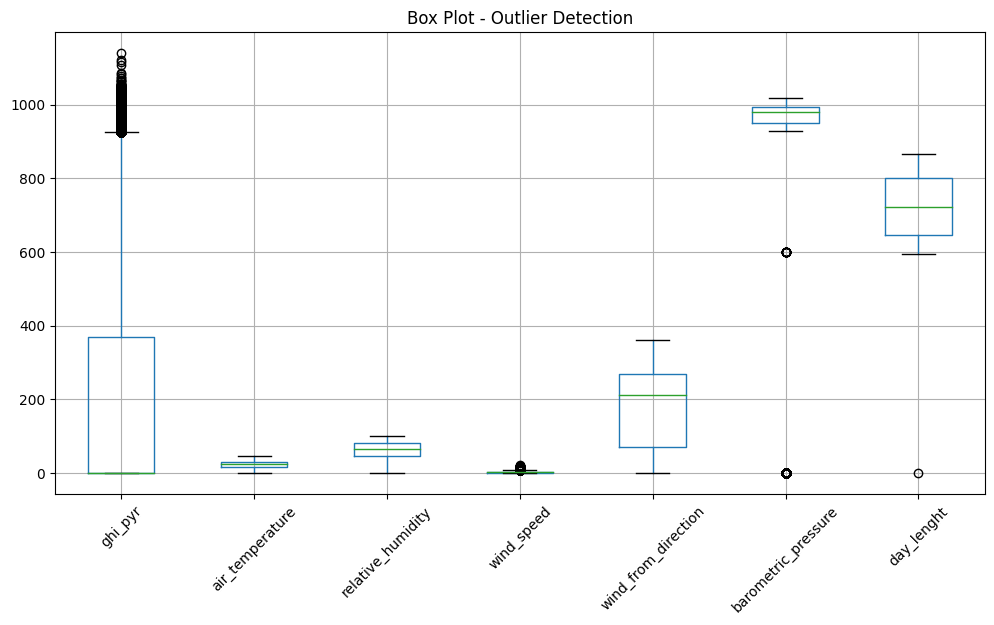

In [ ]:
#data preprocessing
#outlier detection
import matplotlib.pyplot as plt

# Plot box plots to visualize outliers
plt.figure(figsize=(12, 6))
data_deduplicated.boxplot()
plt.title('Box Plot - Outlier Detection')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

#data preprocessing

# Calculate z-scores for the specified columns
z_scores = (data_deduplicated[['ghi_pyr', 'wind_speed', 'barometric_pressure']] - data_deduplicated[['ghi_pyr', 'wind_speed', 'barometric_pressure']].mean()) / data_deduplicated[['ghi_pyr', 'wind_speed', 'barometric_pressure']].std()

# Define a threshold for outliers
threshold = 3

# Create a boolean mask for outliers
outliers_mask = (z_scores > threshold) | (z_scores < -threshold)

# Remove rows containing outliers
data_filtered = data_deduplicated[~outliers_mask.any(axis=1)]

# Display the updated DataFrame
print(data_filtered.head())
print("Modified shape:", data_filtered.shape)

   ghi_pyr  air_temperature  relative_humidity  wind_speed  \
0    628.3             25.5               46.9         3.9   
1    618.6             25.3               47.2         3.8   
2    603.9             25.4               46.4         4.0   
3    584.1             25.5               46.2         3.4   
4    564.7             25.4               47.1         4.5   

   wind_from_direction  barometric_pressure actual_date  day_lenght  
0                  266                948.3  2014-10-25       662.0  
1                  257                948.1  2014-10-25       662.0  
2                  261                948.1  2014-10-25       662.0  
3                  255                948.0  2014-10-25       662.0  
4                  265                947.9  2014-10-25       662.0  
Modified shape: (377951, 8)


In [ ]:
#data preprocessing

import pandas as pd
import numpy as np

# Select the columns for handling erroneous or inconsistent data
columns_to_check = ['ghi_pyr', 'air_temperature', 'relative_humidity', 'wind_speed',
                    'wind_from_direction', 'barometric_pressure']

# Calculate z-scores for the selected columns
z_scores = (data_deduplicated[columns_to_check] - data_deduplicated[columns_to_check].mean()) / data_deduplicated[columns_to_check].std()

# Define the threshold for outliers
threshold = 3

# Create a boolean mask for outliers
outliers_mask = (z_scores > threshold) | (z_scores < -threshold)

# Remove rows containing outliers
data_filtered = data_deduplicated[~outliers_mask.any(axis=1)]

# Display the updated DataFrame
print(data_filtered.head())
print("Modified shape:", data_filtered.shape)


   ghi_pyr  air_temperature  relative_humidity  wind_speed  \
0    628.3             25.5               46.9         3.9   
1    618.6             25.3               47.2         3.8   
2    603.9             25.4               46.4         4.0   
3    584.1             25.5               46.2         3.4   
4    564.7             25.4               47.1         4.5   

   wind_from_direction  barometric_pressure actual_date  day_lenght  
0                  266                948.3  2014-10-25       662.0  
1                  257                948.1  2014-10-25       662.0  
2                  261                948.1  2014-10-25       662.0  
3                  255                948.0  2014-10-25       662.0  
4                  265                947.9  2014-10-25       662.0  
Modified shape: (377951, 8)


In [ ]:
#data preprocessing

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be scaled
columns_to_scale = ['ghi_pyr', 'air_temperature', 'relative_humidity', 'wind_speed', 'barometric_pressure']

# Read the data from CSV file into a DataFrame
data = data_deduplicated

# Apply Min-Max scaling on the selected columns
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[columns_to_scale])

# Create a new DataFrame with the scaled data
data_normalized = pd.DataFrame(data_scaled, columns=columns_to_scale)

# Concatenate the normalized columns with the remaining columns
data_processed = pd.concat([data_normalized, data.drop(columns_to_scale, axis=1)], axis=1)

# Display the updated DataFrame
print(data_processed.head())
print("Modified shape:", data_processed.shape)


    ghi_pyr  air_temperature  relative_humidity  wind_speed  \
0  0.551140         0.553145              0.469    0.188406   
1  0.542632         0.548807              0.472    0.183575   
2  0.529737         0.550976              0.464    0.193237   
3  0.512368         0.553145              0.462    0.164251   
4  0.495351         0.550976              0.471    0.217391   

   barometric_pressure  wind_from_direction actual_date  day_lenght  
0             0.931258                  266  2014-10-25       662.0  
1             0.931062                  257  2014-10-25       662.0  
2             0.931062                  261  2014-10-25       662.0  
3             0.930963                  255  2014-10-25       662.0  
4             0.930865                  265  2014-10-25       662.0  
Modified shape: (383540, 8)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select the columns to be scaled
columns_to_scale = ['ghi_pyr', 'air_temperature', 'relative_humidity', 'wind_speed', 'barometric_pressure']

# Select the categorical columns
categorical_columns = ['sensor_cleaning']

# Read the data from CSV file into a DataFrame
data = data_deduplicated

# Apply Min-Max scaling on the selected columns
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[columns_to_scale])

# Create a new DataFrame with the scaled data
data_normalized = pd.DataFrame(data_scaled, columns=columns_to_scale)

# Remove unnecessary columns
columns_to_remove = ['wind_from_direction', 'actual_date', 'day_lenght']
data_processed = pd.concat([data_normalized, data.drop(columns_to_scale + columns_to_remove, axis=1)], axis=1)

# Check if categorical columns exist in the DataFrame
existing_categorical_columns = list(set(categorical_columns) & set(data_processed.columns))

if existing_categorical_columns:
    # Apply one-hot encoding on the categorical columns
    transformer = ColumnTransformer([('encoder', OneHotEncoder(), existing_categorical_columns)], remainder='passthrough')
    data_encoded = transformer.fit_transform(data_processed)

    # Convert the encoded data back to DataFrame
    data_encoded = pd.DataFrame(data_encoded)

    # Display the updated DataFrame
    print(data_encoded.head())
    print("Modified shape:", data_encoded.shape)
else:
    print("Categorical columns not found in the DataFrame.")


# Assuming you have cleaned data stored in a DataFrame called 'cleaned_data'
data_processed.to_csv('cleaned_data_solar_radiation.csv', index=False)



Categorical columns not found in the DataFrame.


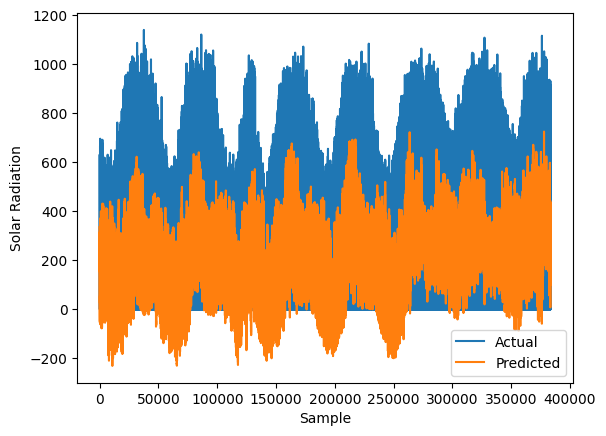

In [ ]:
#data visualization
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Select the columns to be scaled
columns_to_scale = ['air_temperature', 'relative_humidity', 'wind_speed', 'barometric_pressure']

# Read the data from CSV file into a DataFrame
data = data_deduplicated

# Apply Min-Max scaling on the selected columns
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[columns_to_scale])

# Create a new DataFrame with the scaled data
data_normalized = pd.DataFrame(data_scaled, columns=columns_to_scale)

# Concatenate the normalized columns with the remaining columns
data_processed = pd.concat([data_normalized, data['ghi_pyr']], axis=1)

# Split the data into features (X) and target variable (y)
X = data_processed.drop('ghi_pyr', axis=1)
y = data_processed['ghi_pyr']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the trained model
predictions = model.predict(X)

# Visualize the actual values and predicted values
plt.plot(y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Solar Radiation')
plt.legend()
plt.show()


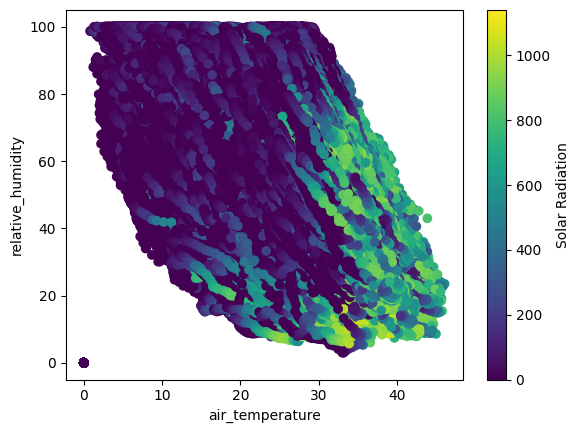

In [ ]:
#data visualization of preprocessed data

import pandas as pd
import matplotlib.pyplot as plt

# Select the columns for the scatter plot
columns_to_plot = ['air_temperature', 'relative_humidity']

# Read the data from CSV file into a DataFrame
data = data_deduplicated

# Create the scatter plot
plt.scatter(data[columns_to_plot[0]], data[columns_to_plot[1]], c=data['ghi_pyr'], cmap='viridis')
plt.xlabel(columns_to_plot[0])
plt.ylabel(columns_to_plot[1])
plt.colorbar(label='Solar Radiation')
plt.show()


In [7]:
#Decision tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

data = pd.read_csv('cleaned_data_solar_radiation.csv')

# Separate features and labels
X = data.drop('ghi_pyr', axis=1)
y = data['ghi_pyr']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a decision tree regressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Predict labels for test data
y_pred = regressor.predict(X_test)

# Print the decision rules
tree_rules = export_text(regressor, feature_names=list(X.columns))
print(tree_rules)



|--- air_temperature <= 0.66
|   |--- relative_humidity <= 0.72
|   |   |--- air_temperature <= 0.40
|   |   |   |--- air_temperature <= 0.27
|   |   |   |   |--- air_temperature <= 0.22
|   |   |   |   |   |--- barometric_pressure <= 0.93
|   |   |   |   |   |   |--- relative_humidity <= 0.40
|   |   |   |   |   |   |   |--- air_temperature <= 0.21
|   |   |   |   |   |   |   |   |--- barometric_pressure <= 0.47
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |--- barometric_pressure >  0.47
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- air_temperature >  0.21
|   |   |   |   |   |   |   |   |--- air_temperature <= 0.21
|   |   |   |   |   |   |   |   |   |--- wind_speed <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |   |   |   |   |--- wind_speed >  0.10
|   |   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |--- air_temperature

In [9]:
#apriori algorithm

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

data = pd.read_csv('cleaned_data_solar_radiation.csv')

# Perform one-hot encoding of the data
encoded_data = pd.get_dummies(data)
encoded_data = encoded_data.astype(bool)  # Convert values to True or False

# Apply the Apriori algorithm
frequent_itemsets = apriori(encoded_data, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Print the association rules
print(rules)


                        antecedents  \
0                 (air_temperature)   
1                         (ghi_pyr)   
2               (relative_humidity)   
3                         (ghi_pyr)   
4                      (wind_speed)   
..                              ...   
156      (air_temperature, ghi_pyr)   
157    (relative_humidity, ghi_pyr)   
158  (ghi_pyr, barometric_pressure)   
159                    (wind_speed)   
160                       (ghi_pyr)   

                                           consequents  antecedent support  \
0                                            (ghi_pyr)            0.991245   
1                                    (air_temperature)            0.502229   
2                                            (ghi_pyr)            0.991245   
3                                  (relative_humidity)            0.502229   
4                                            (ghi_pyr)            0.916528   
..                                                 ...         

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


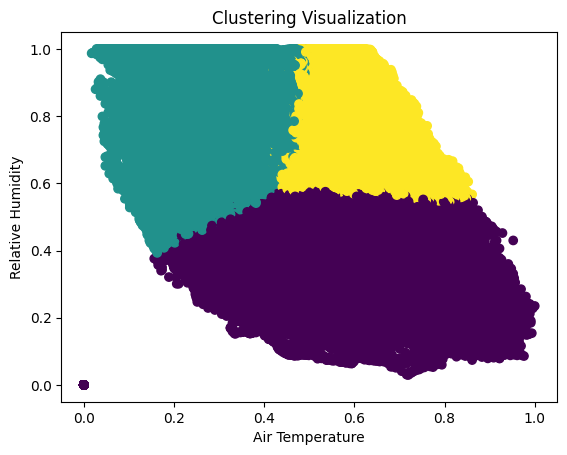

In [11]:
#clustering

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('cleaned_data_solar_radiation.csv')

# Select the features for clustering
X = data[['air_temperature', 'relative_humidity', 'wind_speed', 'barometric_pressure']]

# Perform K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
data['cluster'] = clusters

# Visualize the clusters
plt.scatter(data['air_temperature'], data['relative_humidity'], c=data['cluster'])
plt.xlabel('Air Temperature')
plt.ylabel('Relative Humidity')
plt.title('Clustering Visualization')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


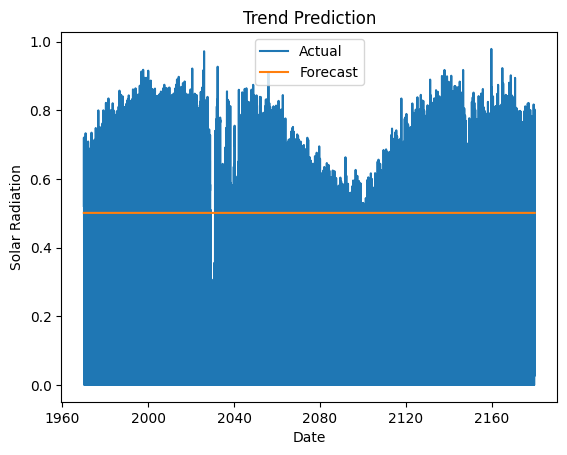

In [14]:
#prediction trend

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('cleaned_data_solar_radiation.csv')

# Assuming the data has a 'ghi_pyr' column
values = data['ghi_pyr']

# Split the data into training and testing sets
train_size = int(len(values) * 0.8)
train_data, test_data = values[:train_size], values[train_size:]

# Fit ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=len(test_data))

# Create a synthetic date range for plotting
start_date = pd.to_datetime(data.index[train_size])
date_range = pd.date_range(start=start_date, periods=len(test_data), freq='D')

# Plot the actual and forecasted values
plt.plot(date_range, test_data, label='Actual')
plt.plot(date_range, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Solar Radiation')
plt.title('Trend Prediction')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


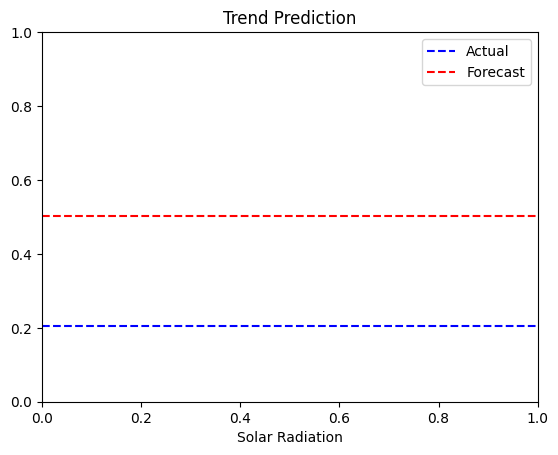

In [16]:
#pattern identification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('cleaned_data_solar_radiation.csv')

# Assuming the data has a 'ghi_pyr' column
values = data['ghi_pyr']

# Split the data into training and testing sets
train_size = int(len(values) * 0.8)
train_data, test_data = values[:train_size], values[train_size:]

# Fit ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=len(test_data))

# Plot a horizontal line for actual and forecasted values
plt.axhline(y=np.mean(test_data), color='b', linestyle='--', label='Actual')
plt.axhline(y=np.mean(forecast), color='r', linestyle='--', label='Forecast')
plt.xlabel('Solar Radiation')
plt.title('Trend Prediction')
plt.legend()
plt.show()
